In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from scipy import stats

In [2]:
delf=1
rf=range(40,121,delf)
ar=[]
for fr in rf:
    fname='Gain %i MHz phi=0.csv'%fr
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar+=[list(dum.gain)]
ar=np.array(ar)

In [3]:
rt=list(dum.theta)
rt=np.array(rt)
rf=np.array(rf)

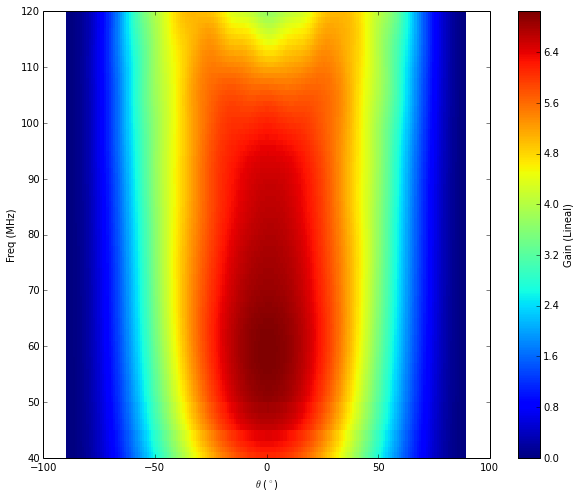

In [4]:
#calculo de la ganancia de la antena vs la frecuencia y el ángulo de elevación (forma normal)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,ar,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi0')

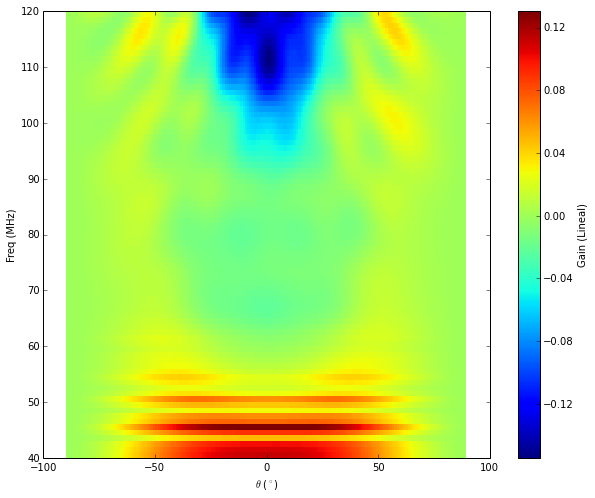

In [5]:
#derivada de la ganancia vs la frecuencia y el ángulo de elevación (forma normal)
deriv=np.gradient(ar,delf)
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rf)
plt.pcolor(x,y,deriv[0],cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Derivadagainphi0')

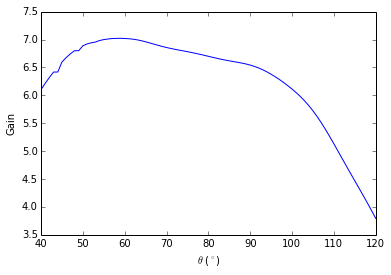

In [60]:
#corte en un ángulo para ver el comportamiento de la ganancia 
te=86
ga=ar[:,te]
plt.plot(rf,ga)
plt.ylabel('Gain')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('corteDipologainphi0')

In [61]:
# primera forma de interpolar 
spl = interpolate.UnivariateSpline(rf, ga)
spl.set_smoothing_factor(0.5)

In [62]:
#para graficar los datos interpolados
delspl=0.2
rfspl=np.arange(40,122,delspl)

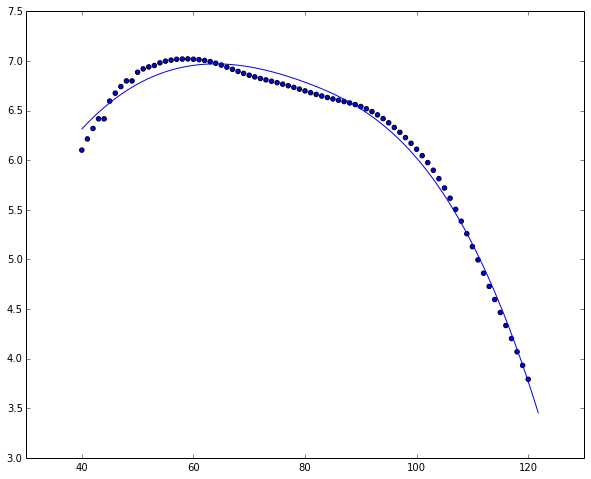

In [63]:
#esta gráfica según lo establecido antes 
plt.figure(figsize=(10,8))
plt.scatter(rf,ga)
plt.plot(rfspl,spl(rfspl))
#plt.savefig('Dipolointerpoladogainphi0')
#plt.xlim(70,90)

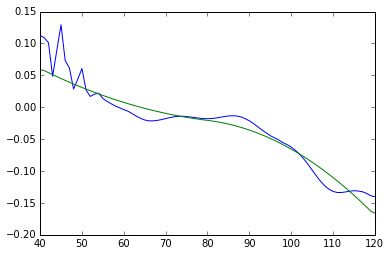

In [64]:
deriv=np.gradient(ar,delf)
derivint=np.gradient(spl(rf),delf)
plt.plot(rf,deriv[0][:,te])
plt.plot(rf,derivint)
#plt.savefig('Dipoloderivadainterpoladogainphi0')

In [65]:
arspl=[]
for t in range(ar.shape[1]):
    ga=ar[:,t]
    spl = interpolate.UnivariateSpline(rf, ga)
    spl.set_smoothing_factor(0.2)
    arspl+=[spl(rfspl)]
arspl=np.array(arspl)

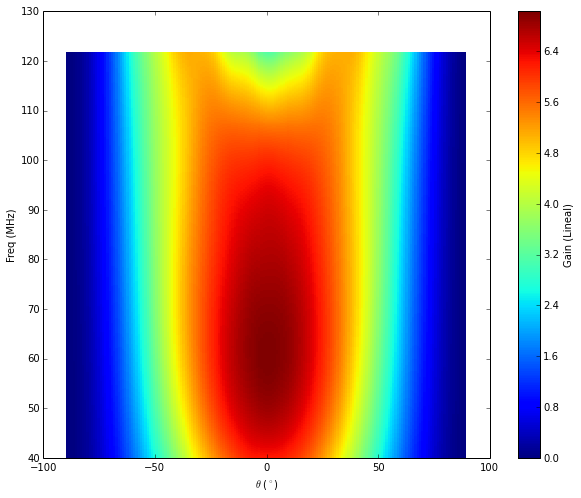

In [12]:
plt.figure(figsize=(10,8))
x,y=np.meshgrid(rt,rfspl)
plt.pcolor(x,y,arspl.T,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipoloderivadainterpoladogainphi0')

In [6]:
bvsp=interpolate.RectBivariateSpline(rf,rt,ar,s=10)
dx2, dy2 = 0.2, 0.2
x2 = np.arange(rt.min(), rt.max(), dx2)
y2 = np.arange(rf.min(), rf.max(), dy2)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = bvsp(y2, x2)

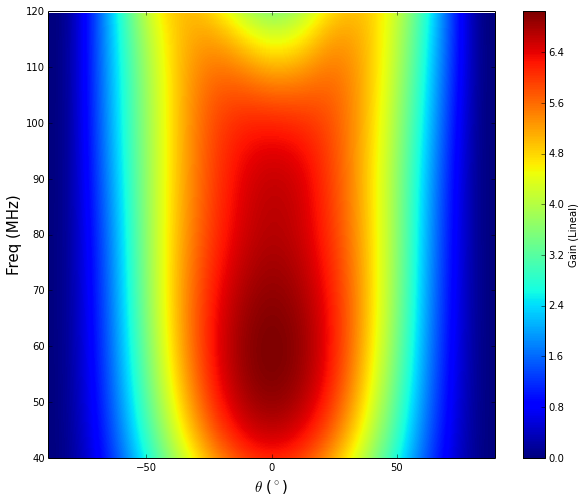

In [7]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,Z2,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(40,120)
plt.xlim(-89,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi0')


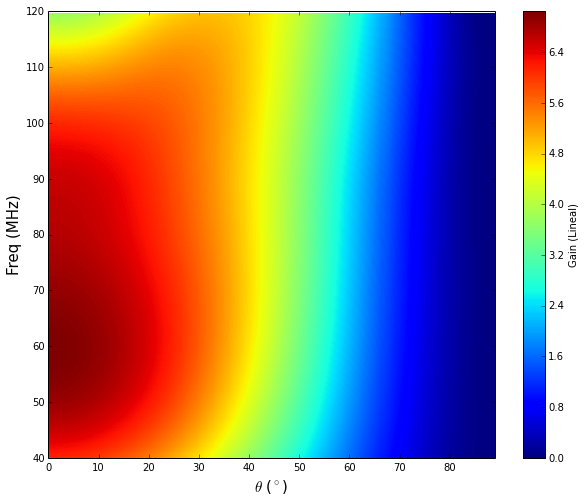

In [8]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,Z2,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(40,120)
plt.xlim(0,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi0(0-89)')

In [9]:
gmax=Z2.max() #cálculo la ganancia máxima
derivbspl=np.gradient(Z2,dx2)
val=max(derivbspl[0].max(),-derivbspl[0].min())
print gmax

7.04243753758


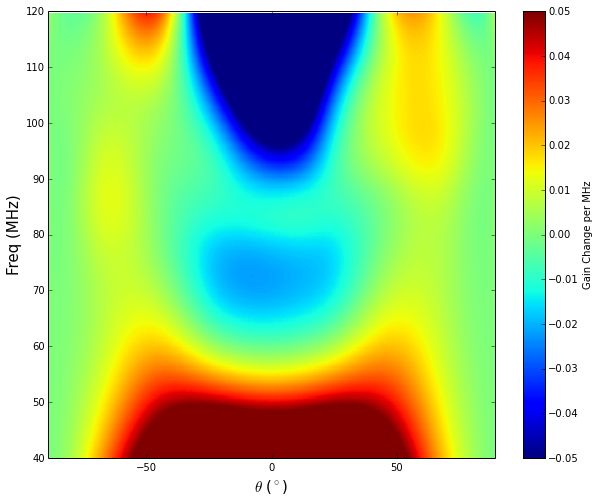

In [17]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(40,120)
plt.xlim(-89,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Derivada_BLADE_Phi0')


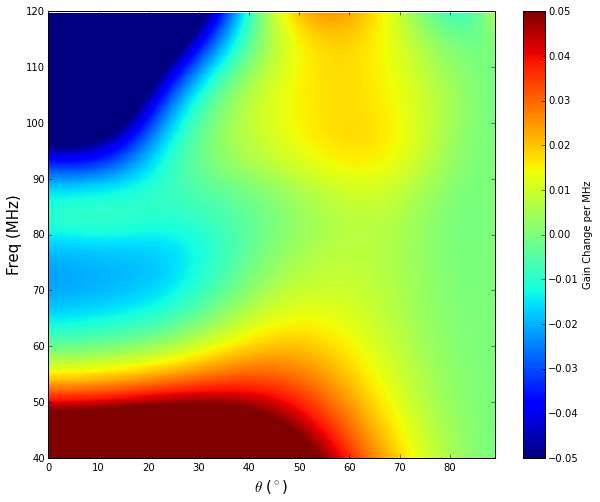

In [18]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(40,120)
plt.xlim(0,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Derivada_BLADE_Phi0(0-90)')

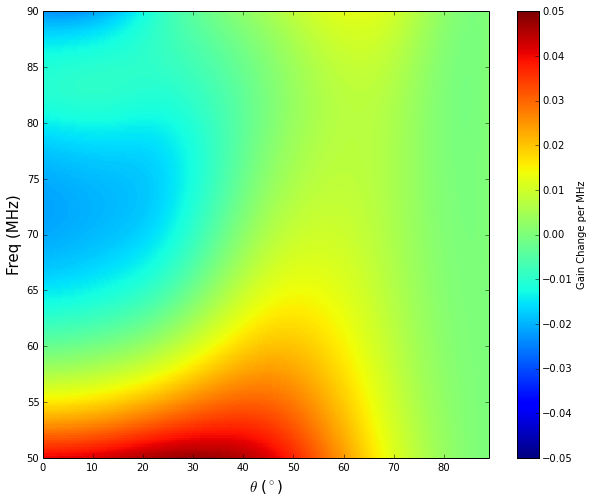

In [10]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(50,90)
plt.xlim(0,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Derivada_BLADE_Phi0(45-95)')

In [37]:
np.average(derivbspl)

0.00056458748052254013

In [29]:
np.array(derivbspl[1])

array([[-0.00069755, -0.00023886,  0.00067685, ..., -0.00345954,
        -0.00252703, -0.00205985],
       [-0.00069745, -0.000236  ,  0.00068521, ..., -0.00353077,
        -0.00259552, -0.00212695],
       [-0.00069691, -0.00023275,  0.00069389, ..., -0.0036012 ,
        -0.00266321, -0.00219328],
       ..., 
       [-0.02943208, -0.0280636 , -0.0253378 , ...,  0.01880287,
         0.0219267 ,  0.02349617],
       [-0.02964963, -0.0282797 , -0.02555099, ...,  0.01949759,
         0.02264543,  0.02422697],
       [-0.02987283, -0.02850145, -0.02576981, ...,  0.0202145 ,
         0.02338694,  0.02498085]])

In [33]:
np.average(derivbspl[1])

-2.6350283610754588e-05

In [35]:
np.std(derivbspl[1])

0.083887692289864021

In [ ]:
plt.figure(figsize=(10,8))
plt.pcolor(x2,y2,derivbspl[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(55,90)
plt.xlim(0,89)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.savefig('Derivada_BLADE_Phi0(55-90)')

In [39]:
delf90=1
rf90=range(40,121,delf90)
ar90=[]
for fr90 in rf90:
    fname='Gain %i MHz phi=90.csv'%fr90
    dum=pd.read_csv(fname,names=['theta','gain'],skiprows=1)
    dum=dum[np.isfinite(dum.gain)]
    ar90+=[list(dum.gain)]
ar90=np.array(ar90)

In [40]:
rt90=list(dum.theta)
rt90=np.array(rt90)
rf90=np.array(rf90)

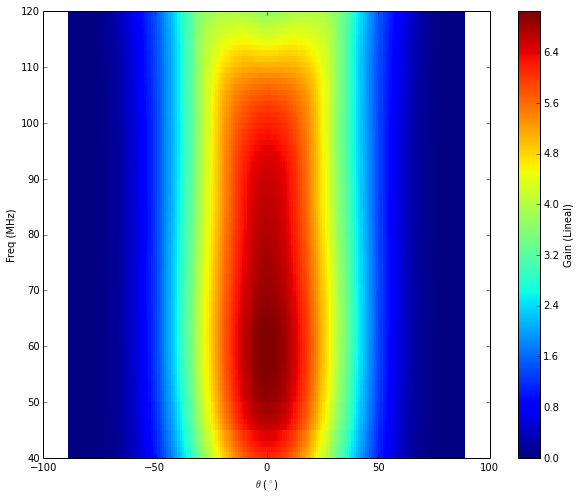

In [22]:
#calculo de la ganancia de la antena vs la frecuencia y el ángulo de elevación (forma normal)
plt.figure(figsize=(10,8))
x90,y90=np.meshgrid(rt90,rf90)
plt.pcolor(x90,y90,ar90,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Dipologainphi90')

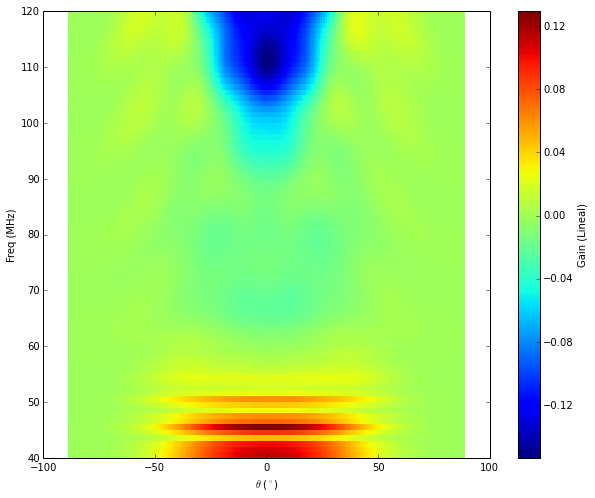

In [23]:
#derivada de la ganancia vs la frecuencia y el ángulo de elevación (forma normal)
deriv90=np.gradient(ar90,delf90)
plt.figure(figsize=(10,8))
x90,y90=np.meshgrid(rt90,rf90)
plt.pcolor(x90,y90,deriv90[0],cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('DerivadaDipologainphi90')

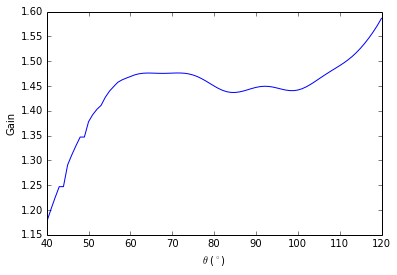

In [53]:
#corte en un ángulo para ver el comportamiento de la ganancia 
te90=40
ga90=ar90[:,te90]
plt.plot(rf90,ga90)
plt.ylabel('Gain')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('CorteDipolosinplanogainphi90')


In [54]:
# primera forma de interpolar 
spl90=interpolate.UnivariateSpline(rf90, ga90)
spl90.set_smoothing_factor(0.2)


In [55]:
#para graficar los datos interpolados
delspl90=0.2
rfspl90=np.arange(40,121,delspl90)


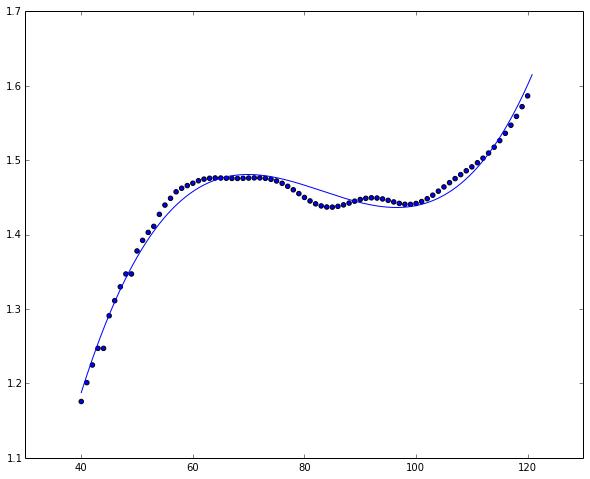

In [56]:
#esta gráfica según lo establecido antes 
plt.figure(figsize=(10,8))
plt.scatter(rf90,ga90)
plt.plot(rfspl90,spl90(rfspl90))
#plt.savefig('2perfilinterpoladovsmuestraphi90dipolo')


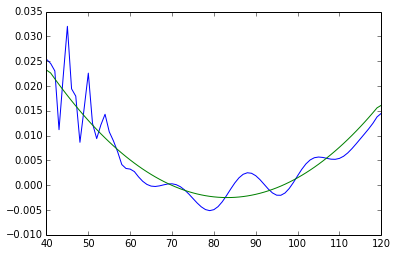

In [57]:
deriv90=np.gradient(ar90,delf90)
derivint90=np.gradient(spl90(rf90),delf90)
plt.plot(rf90,deriv90[0][:,te90])
plt.plot(rf90,derivint90)
#plt.savefig('Derivadainterpoladophi90')


In [1]:
arspl90=[]
for t90 in range(ar.shape[1]):
    ga90=ar90[:,t90]
    spl90 = interpolate.UnivariateSpline(rf90, ga90)
    spl90.set_smoothing_factor(0.2)
    arspl90+=[spl90(rfspl90)]
arspl90=np.array(arspl90)


NameError: name 'ar' is not defined

In [59]:
plt.figure(figsize=(10,8))
x90,y90=np.meshgrid(rt90,rfspl90)
plt.pcolor(x90,y90,arspl90.T,cmap='jet')
#plt.ylim(100,201)
plt.colorbar(label='Gain (Lineal)')
plt.ylabel('Freq (MHz)')
plt.xlabel(r'$\theta$ ($^\circ$)')
#plt.savefig('Gaininterpoladophi90')


AttributeError: 'list' object has no attribute 'T'

In [41]:
bvsp90=interpolate.RectBivariateSpline(rf90,rt90,ar90,s=10)
dx290, dy290 = 0.2, 0.2
x290 = np.arange(rt90.min(), rt90.max(), dx290)
y290 = np.arange(rf90.min(), rf90.max(), dy290)
X290, Y290 = np.meshgrid(x290,y290)
Z290 = bvsp90(y290, x290)


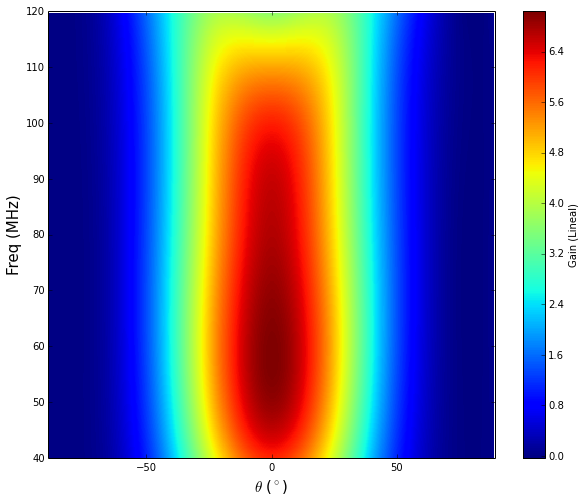

In [8]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,Z290,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.xlim(-89,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi90')

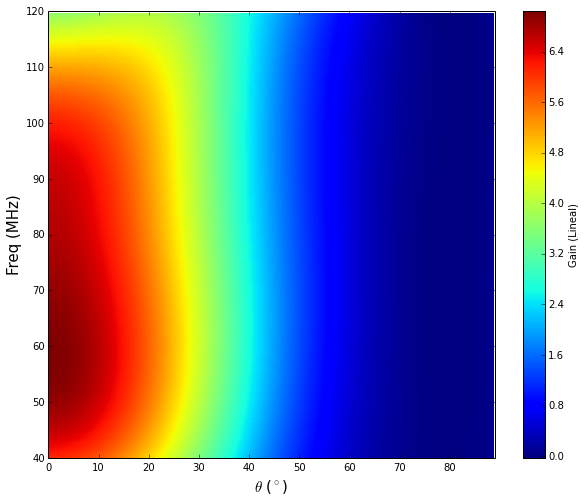

In [9]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,Z290,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia_BLADE_Phi90(0-90)')

In [42]:
gmax90=Z290.max()
derivbspl90=np.gradient(Z290,dx290)
val90=max(derivbspl90[0].max(),-derivbspl90[0].min())


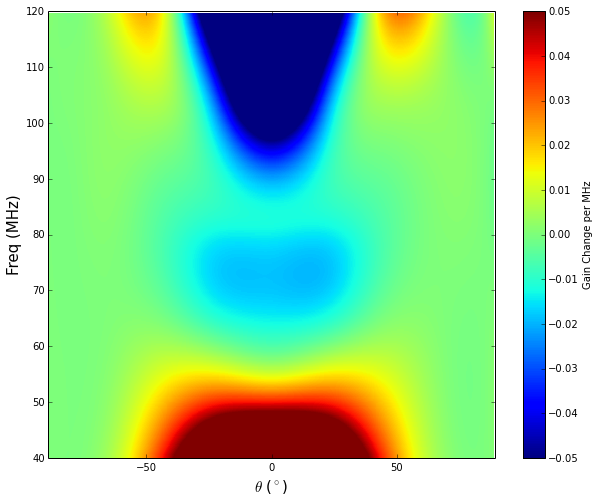

In [35]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,derivbspl90[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.xlim(-89,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90')


In [ ]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,derivbspl90[0],cmap='jet',vmin=-0.05,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90(0-89)')

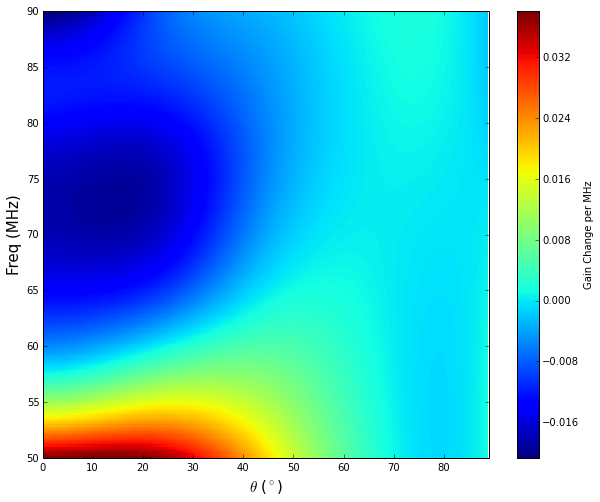

In [103]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,derivbspl90[0],cmap='jet',vmin=np.min(derivbspl90prueba[0]),vmax=np.max(derivbspl90prueba[0])) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(50,90)
plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90(45-95)MHz')

In [ ]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,derivbspl90[0],cmap='jet',vmin=-0.04,vmax=0.05) #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.ylim(55,90)
plt.xlim(0,89)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90(55-90)MHz')

In [47]:
np.min(derivbspl90)

-0.17236510121125148

In [48]:
np.max(derivbspl90)

0.15751153376011073

In [84]:
lim=gmax*1/100.
B=(derivbspl[0]<lim)&(derivbspl[0]>-lim)
B=B.astype(np.int)


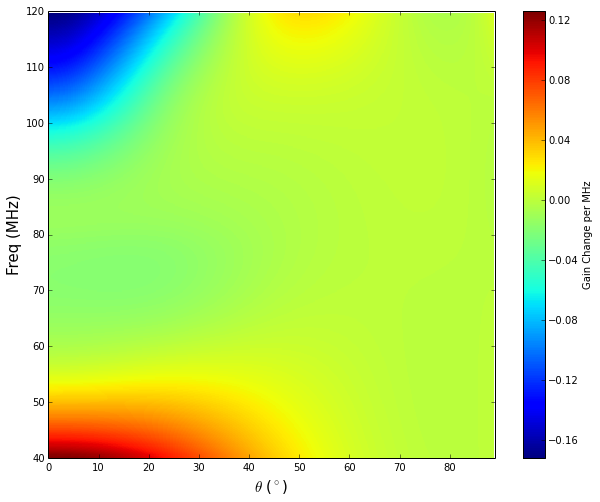

In [82]:
plt.figure(figsize=(10,8))
plt.pcolor(x290,y290,derivbspl90[0],cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90(0-89)_sinlimites')

In [80]:
derivbspl90[0]

array([[ 0.00028588,  0.00027614,  0.00026619, ...,  0.00076402,
         0.00081758,  0.00087232],
       [ 0.00028597,  0.00027635,  0.0002665 , ...,  0.00077315,
         0.00082738,  0.00088279],
       [ 0.00028615,  0.00027675,  0.00026711, ...,  0.00079128,
         0.00084681,  0.00090356],
       ..., 
       [ 0.00149422,  0.00141876,  0.00134477, ...,  0.0090841 ,
         0.00974611,  0.0104257 ],
       [ 0.00153154,  0.00145319,  0.00137639, ...,  0.00926058,
         0.00993565,  0.01062863],
       [ 0.0015503 ,  0.0014705 ,  0.00139229, ...,  0.0093492 ,
         0.01003082,  0.01073053]])

In [89]:
bvsp90este=interpolate.RectBivariateSpline(rf90,rt90,ar90,s=10)
dx290este, dy290este = 0.2, 0.2
xprueba = np.arange(0, 89, dx290este)
yprueba = np.arange(50, 90, dy290este)
Xprueba, Yprueba = np.meshgrid(xprueba,yprueba)
Zprueba = bvsp90(yprueba, xprueba)


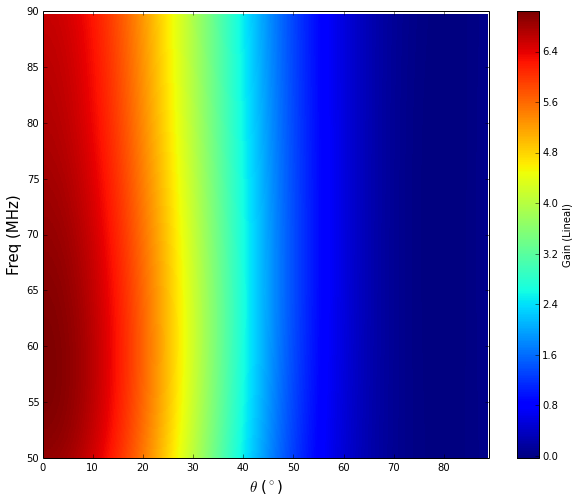

In [90]:
plt.figure(figsize=(10,8))
plt.pcolor(xprueba,yprueba,Zprueba,cmap='jet')
plt.colorbar(label='Gain (Lineal)')
plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)', fontsize = 15)
plt.xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
plt.savefig('Ganancia')

In [91]:
derivbspl90prueba=np.gradient(Zprueba,dx290este)

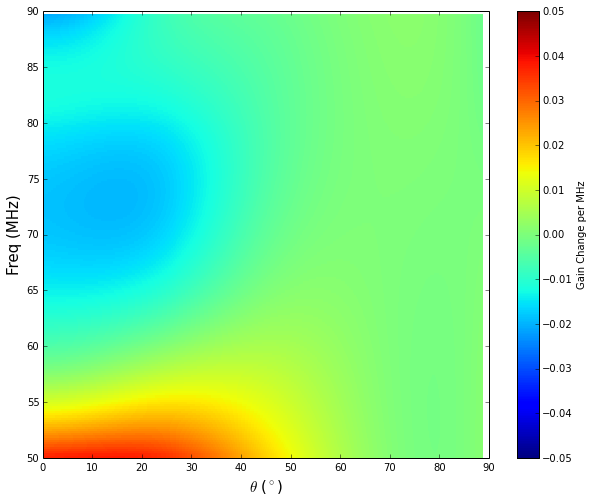

In [113]:
plt.figure(figsize=(10,8))
plt.pcolor(xprueba,yprueba,derivbspl90prueba[0],vmin=-0.05,vmax=0.05,cmap='jet') #deriv[0] es a lo largo del eje de frecuencias
plt.colorbar(label='Gain Change per MHz')
#plt.xlim(0,89)
#plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Freq (MHz)',fontsize=15)
plt.xlabel(r'$\theta$ ($^\circ$)',fontsize=15)
plt.savefig('Derivada_BLADE_Phi90(0-89)_sinlimites')

In [86]:
rt90

array([-89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77,
       -76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64,
       -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51,
       -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
       -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89])